In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use("seaborn-whitegrid")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_32/1759593133.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [4]:
#making filt data where if missing sum is >20, the column is droppped.

def filter_na(df):
    df_na_sum = df.isna().sum()
    for column, count in df_na_sum.items():
        if count > 20:
            df = df.drop(columns=[column])
        else:
            continue
    return df

In [5]:
def fillna_small(df):
    for i in df.columns:
        if df[i].dtype == 'object':
            common = df[i].mode()[0]
            df[i].fillna(common, inplace=True)
        
        elif df[i].dtype in ['int64', 'float64']:
            average = df[i].mean()
            df[i].fillna(average, inplace=True)
    return df

# Train set

In [6]:
def make_df(directory):
    df = pd.read_csv(directory)
    df = pd.DataFrame(df)
    return df

In [7]:
df_train = make_df("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


MSSubClass: Identifies the type of dwelling involved in the sale.

MSZoning: Identifies the general zoning classification of the sale.

LotFrontage: Linear feet of street connected to property.

LotArea: Lot size in square feet

Street: Type of road access to property

Alley: Type of alley access to property

LotShape: General shape of property

In [8]:
nan_counts = df_train.isna().sum()


pd.set_option('display.max_rows', None) 
# Display NaN counts in each column
print(nan_counts)
pd.set_option('display.max_rows', 6) 

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
df_train.shape

(1460, 81)

In [10]:
pd.set_option('display.max_rows', None)
print(df_train.dtypes)
pd.set_option('display.max_rows', 6)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [11]:
df_train_filt = filter_na(df_train)

nan_counts = df_train_filt.isna().sum()

pd.set_option('display.max_rows', None) 
# Display NaN counts in each column
print(nan_counts)
pd.set_option('display.max_rows', 6) 

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
MasVnrArea       8
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive  

In [12]:
fillna_small(df_train_filt)
df_train_filt.shape

(1460, 65)

In [13]:
X = df_train_filt.copy()
y = X["SalePrice"]
# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [14]:
X

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,8450,0,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,208500
1,2,20,0,9600,0,0,0,0,1,0,...,0,0,0,0,0,5,2007,0,0,181500
2,3,60,0,11250,0,1,0,0,0,0,...,0,0,0,0,0,9,2008,0,0,223500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,1458,70,0,9042,0,0,0,0,0,0,...,0,0,0,0,2500,5,2010,0,0,266500
1458,1459,20,0,9717,0,0,0,0,0,0,...,112,0,0,0,0,4,2010,0,0,142125
1459,1460,20,0,9937,0,0,0,0,0,0,...,0,0,0,0,0,6,2008,0,0,147500


In [15]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

binfo_gen = mutual_info_regression(X, y)

In [16]:
binfo = binfo_gen

In [17]:
for i, feature in enumerate(X.columns):
    print(f"Feature: {feature}, MI: {binfo[i]}")

Feature: Id, MI: 0.0
Feature: MSSubClass, MI: 0.2821045951831982
Feature: MSZoning, MI: 0.12108368378856782
Feature: LotArea, MI: 0.15920418379806067
Feature: Street, MI: 0.0
Feature: LotShape, MI: 0.08640942427028153
Feature: LandContour, MI: 0.0248123140080454
Feature: Utilities, MI: 0.0
Feature: LotConfig, MI: 0.017288931656960216
Feature: LandSlope, MI: 0.0
Feature: Neighborhood, MI: 0.49423405232418594
Feature: Condition1, MI: 0.012321198775040232
Feature: Condition2, MI: 0.009191657645947204
Feature: BldgType, MI: 0.04193695570908673
Feature: HouseStyle, MI: 0.0832452383525033
Feature: OverallQual, MI: 0.5576042304958393
Feature: OverallCond, MI: 0.11432832724908826
Feature: YearBuilt, MI: 0.3591111393919877
Feature: YearRemodAdd, MI: 0.2547954659898872
Feature: RoofStyle, MI: 0.0036190856030944296
Feature: RoofMatl, MI: 0.010478791298549561
Feature: Exterior1st, MI: 0.13077657431736034
Feature: Exterior2nd, MI: 0.1691787172587782
Feature: MasVnrType, MI: 0.09133776752251954
Feat

In [18]:
binfo_df = pd.DataFrame(binfo)
binfo_df.rename(columns = {0:'MI'}, inplace = True)
binfo_df['Features'] = X.columns

In [19]:
binfo_df

,MI,Features
0,0.000000,Id
1,0.282105,MSSubClass
2,0.121084,MSZoning
...,...,...
62,0.076632,SaleType
63,0.067168,SaleCondition
64,5.566334,SalePrice


In [20]:
binfo_df = binfo_df.sort_values(by ='MI', ascending = False)
binfo_df

,MI,Features
64,5.566334,SalePrice
15,0.557604,OverallQual
10,0.494234,Neighborhood
...,...,...
7,0.000000,Utilities
4,0.000000,Street
0,0.000000,Id


In [21]:
def plot_mi(df, sort_name, y_name, title):
    df = df.sort_values(by=sort_name, ascending=True)
    width = np.arange(len(df))
    tick = list(df[y_name])
    plt.barh(width, df[sort_name])
    plt.yticks(width, tick)
    plt.title(title)
    plt.show()

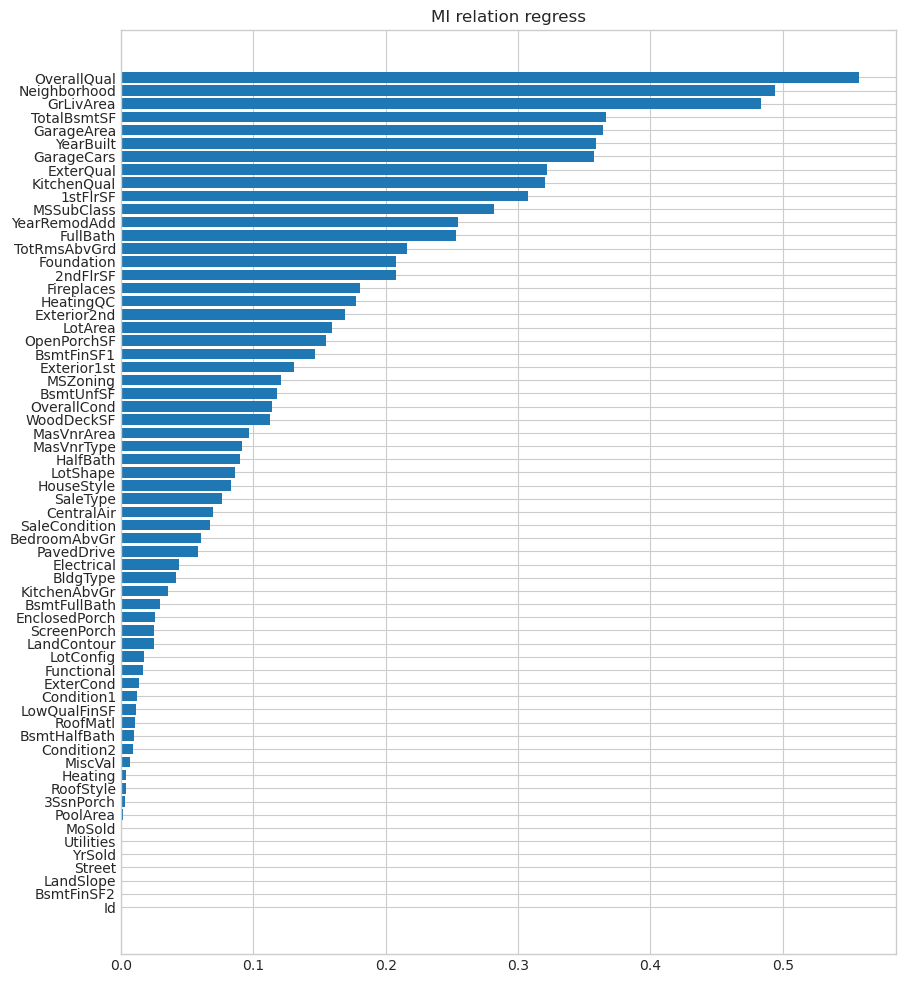

In [22]:
binfo_ = binfo_df[binfo_df['Features'] != 'SalePrice']

plt.figure(dpi=100, figsize=(10, 12))
plot_mi(binfo_, 'MI', 'Features', "MI relation regress")

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


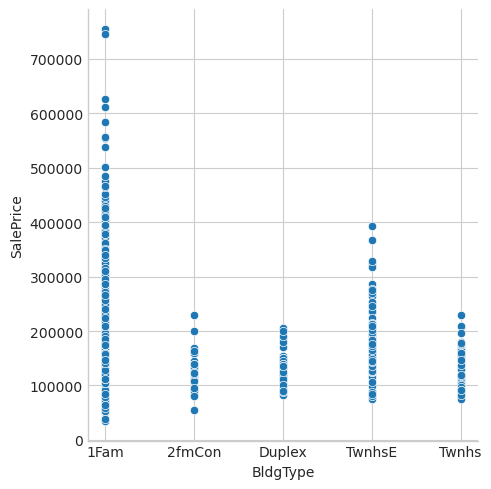

In [23]:
sns.relplot(x='BldgType', y='SalePrice', data=df_train_filt);

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


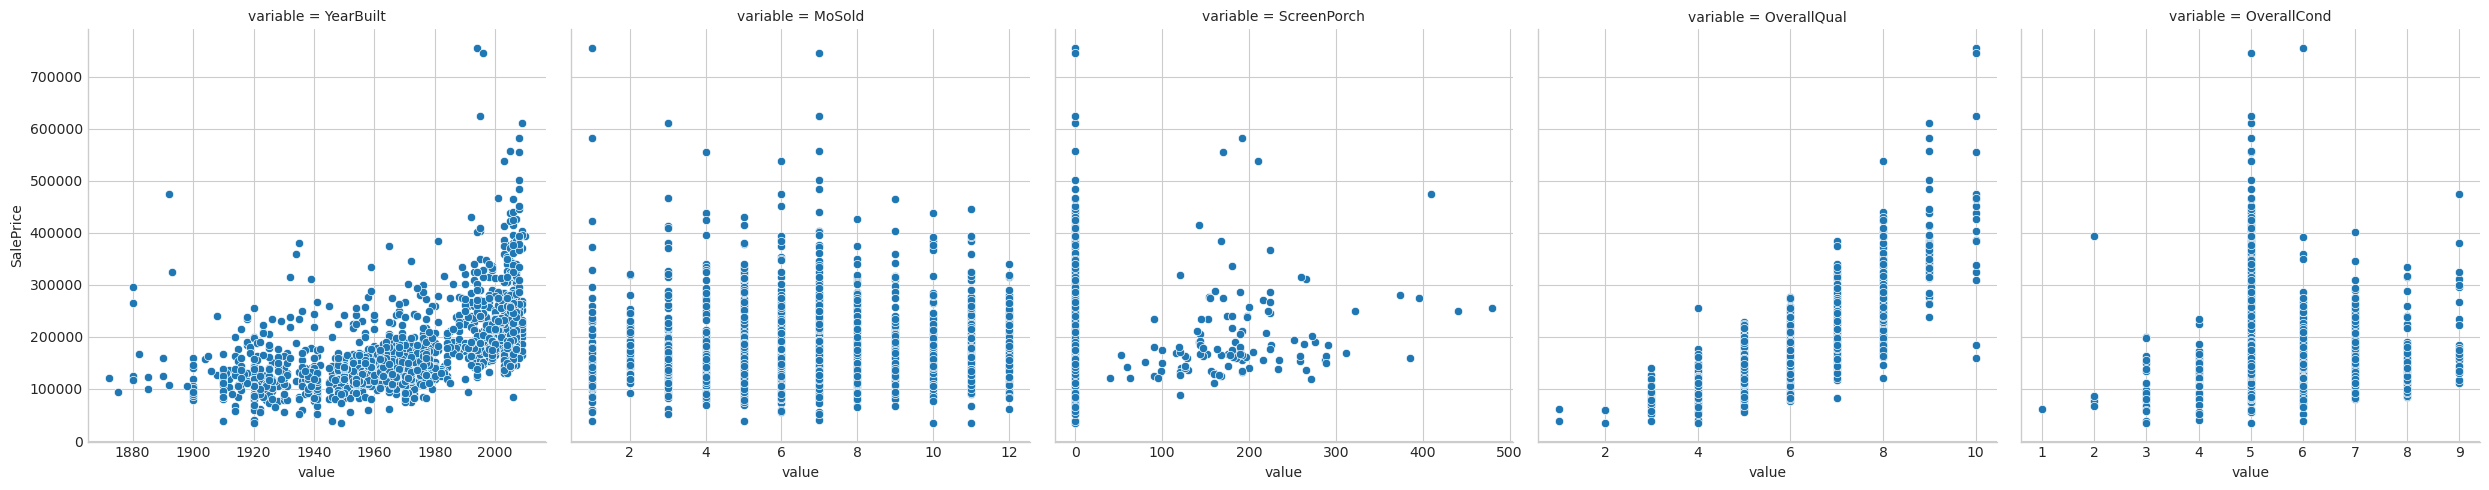

In [24]:
features = ["YearBuilt", "MoSold", "ScreenPorch", "OverallQual", "OverallCond"]
sns.relplot(
    x="value", y="SalePrice", col="variable", data=df_train.melt(id_vars="SalePrice", value_vars=features), facet_kws=dict(sharex=False),
);

In [25]:
from sklearn.preprocessing import LabelEncoder

def corre_heatmap(df):
    encoder = LabelEncoder()
    
    df_category = df.select_dtypes(include=['object']).columns
    
    
    
    for column in df_category:
        df[column] = encoder.fit_transform(df[column])
    
    correlation_matrix = df.corr()
    plt.figure(figsize=(20, 16))
    sns.heatmap(correlation_matrix, annot=False, cmap='RdBu', vmin=-1, vmax=1, linewidths=0.5)
    plt.show()

In [26]:
pd.set_option("display.max_columns", None)

X.shape

(1460, 65)

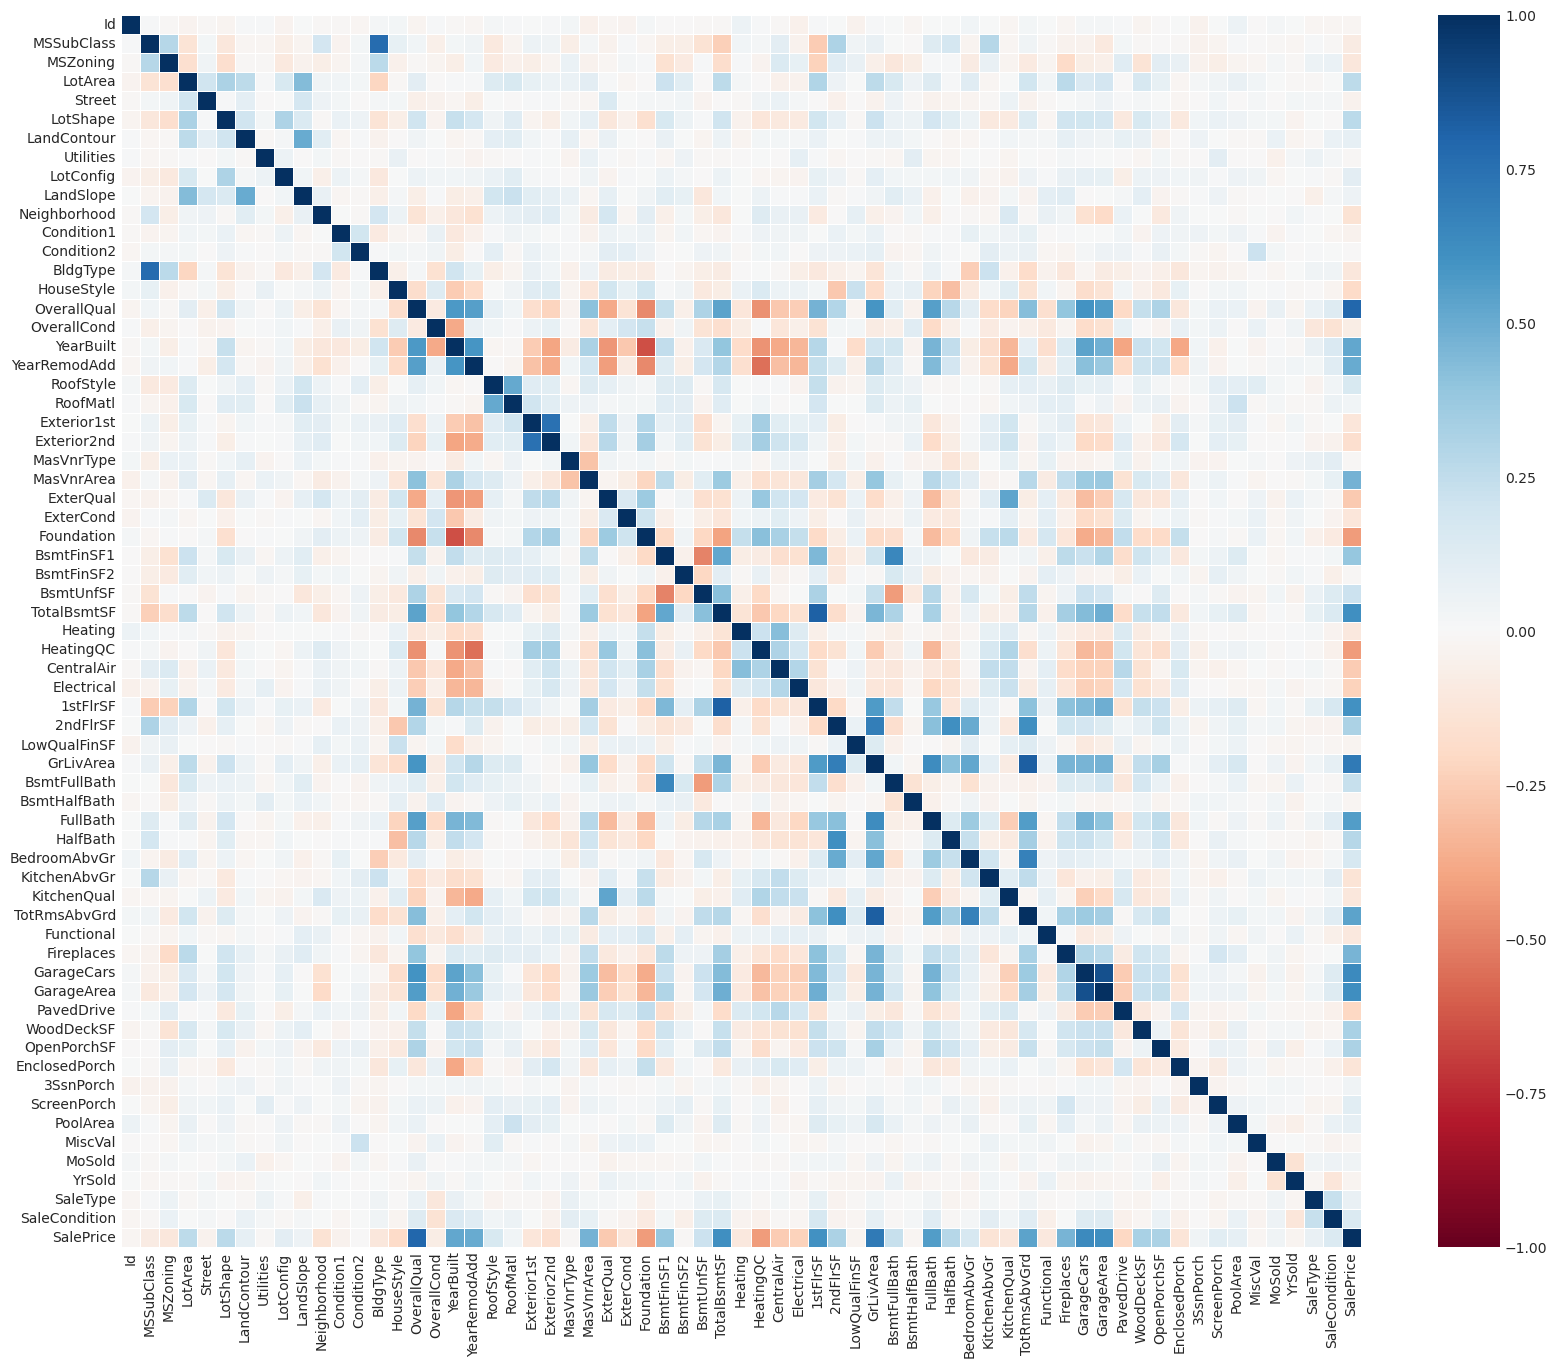

In [27]:
corre_heatmap(X)

# Test set

In [28]:
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
df_test = pd.DataFrame(test)

nan_counts = df_test.isna().sum()


pd.set_option('display.max_rows', None) 
# Display NaN counts in each column
print(nan_counts)
pd.set_option('display.max_rows', 6) 

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [29]:
df_test_filt = filter_na(df_test)
df_test_filt

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,468.0,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,1.0,730.0,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,923.0,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,1.0,312.0,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,791.0,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,2.0,482.0,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,1224.0,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,2.0,576.0,Y,474,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,337.0,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,0.0,0.0,Y,80,32,0,0,0,0,700,7,2006,WD,Normal
1458,2919,60,RL,9627,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,758.0,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,3.0,650.0,Y,190,48,0,0,0,0,0,11,2006,WD,Normal


In [30]:
nan_counts = df_test_filt.isna().sum()

pd.set_option('display.max_rows', None) 
# Display NaN counts in each column
print(nan_counts)
pd.set_option('display.max_rows', 6) 

Id                0
MSSubClass        0
MSZoning          4
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         2
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       1
Exterior2nd       1
MasVnrType       16
MasVnrArea       15
ExterQual         0
ExterCond         0
Foundation        0
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      2
BsmtHalfBath      2
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       1
TotRmsAbvGrd      0
Functional        2
Fireplaces        0


In [31]:
df_test_filt = fillna_small(df_test_filt)
df_test_filt.shape 

(1459, 64)

In [32]:
nan_counts = df_test_filt.isna().sum()


pd.set_option('display.max_rows', None) 
# Display NaN counts in each column
print(nan_counts)
pd.set_option('display.max_rows', 6) 

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive  

In [33]:
if df_train_selected_test.columns.equals(df_train_selected.columns):
    print("Both DataFrames have the same columns.")
else:
    print("The columns in the two DataFrames are different.")

NameError: name 'df_train_selected_test' is not defined

# Feature selection 

# df_train

Train a RandomForestReg and NeuralNet with...

Original feature selections.

Selected features.



## Removed features
'Id',
     'Street',
     'Utilities',
     'Condition1',
     'Condition2',
     'HouseStyle',
     'BsmtFinSF2',
     'LowQualFinSF',
     'BsmtHalfBath',
     'Functional',
     'EnclosedPorch',
     '3SsnPorch',
     'ScreenPorch',
     'PoolArea',
     'YrSold',
     'MiscVal',
     'MoSold',
     'SaleType',
     'SaleType',
     'SaleCondition'

In [34]:
columns_only_in_df_train_filt = df_train_filt.columns.difference(df_test_filt.columns)
print("Columns only in df_train_filt:")
print(columns_only_in_df_train_filt)

# Find the columns that are in df2 but not in df1
columns_only_in_df_test_filt = df_test_filt.columns.difference(df_train_filt.columns)
print("\nColumns only in df_test_filt:")
print(columns_only_in_df_test_filt)

# Compare the common columns for differences
common_columns = df_train_filt.columns.intersection(df_test_filt.columns)

Columns only in df_train_filt:
Index(['SalePrice'], dtype='object')

Columns only in df_test_filt:
Index([], dtype='object')


In [35]:
def df_selected(df, filt):
    for i in filt:
        if i in df.columns:
            df = df.drop(i, axis=1)
        else:
            continue
    return df

In [71]:
exclude_train = ['Id',
     'Street',
     'Utilities',
     'Condition1',
     'Condition2',
     'HouseStyle',
     'BsmtFinSF2',
     'LowQualFinSF',
     'BsmtHalfBath',
     'Functional',
     'EnclosedPorch',
     '3SsnPorch',
     'ScreenPorch',
     'PoolArea',
     'YrSold',
     'MiscVal',
     'MoSold',
     'SaleType',
     'SaleType',
     'SaleCondition',
     'MSZoning',
     'LotArea',
     'LotShape',
     'LandContour',
     'LotConfig',
     'LandSlope',
     'Neighborhood',
     'RoofStyle',
     'RoofMatl',
     'Exterior1st',
     'Exterior2nd',
     'Heating',
     'BldgType',
     'BsmtCond', 
     'BsmtExposure',
     'BsmtFinSF1', 
     'BsmtFinType1',
     'BsmtFinType2', 
     'BsmtFullBath', 
     'BsmtQual', 
     'BsmtUnfSF', 
     'GarageArea',
     'GarageCars', 
     'GarageCond', 
     'GarageFinish', 
     'GarageQual', 
     'GarageType',
     'GarageYrBlt', 
     'KitchenQual', 
     'MasVnrArea', 
     'MasVnrType', 
     'TotalBsmtSF']

In [43]:
exclude_test = ['Id',
     'Street',
     'Utilities',
     'Condition1',
     'Condition2',
     'HouseStyle',
     'BsmtFinSF2',
     'LowQualFinSF',
     'BsmtHalfBath',
     'Functional',
     'EnclosedPorch',
     '3SsnPorch',
     'ScreenPorch',
     'PoolArea',
     'YrSold',
     'MiscVal',
     'MoSold',
     'SaleType',
     'SaleType',
     'SaleCondition',
     'MSZoning',
     'LotArea',
     'LotShape',
     'LandContour',
     'LotConfig',
     'LandSlope',
     'Neighborhood',
     'RoofStyle',
     'RoofMatl',
     'Exterior1st',
     'Exterior2nd',
     'Heating',
     'BldgType',]

In [44]:
df_train_selected = df_selected(df_train_filt, exclude_test)
df_test_selected = df_selected(df_test_filt, exclude_test)

In [74]:
pd.set_option('display.max_columns', None) 
df_train_selected

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,Foundation,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,PavedDrive,WoodDeckSF,OpenPorchSF,SalePrice
0,60,7,5,2003,2003,Gd,TA,PConc,Ex,Y,SBrkr,856,854,1710,2,1,3,1,8,0,Y,0,61,208500
1,20,6,8,1976,1976,TA,TA,CBlock,Ex,Y,SBrkr,1262,0,1262,2,0,3,1,6,1,Y,298,0,181500
2,60,7,5,2001,2002,Gd,TA,PConc,Ex,Y,SBrkr,920,866,1786,2,1,3,1,6,1,Y,0,42,223500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,70,7,9,1941,2006,Ex,Gd,Stone,Ex,Y,SBrkr,1188,1152,2340,2,0,4,1,9,2,Y,0,60,266500
1458,20,5,6,1950,1996,TA,TA,CBlock,Gd,Y,FuseA,1078,0,1078,1,0,2,1,5,0,Y,366,0,142125
1459,20,5,6,1965,1965,Gd,TA,CBlock,Gd,Y,SBrkr,1256,0,1256,1,1,3,1,6,0,Y,736,68,147500


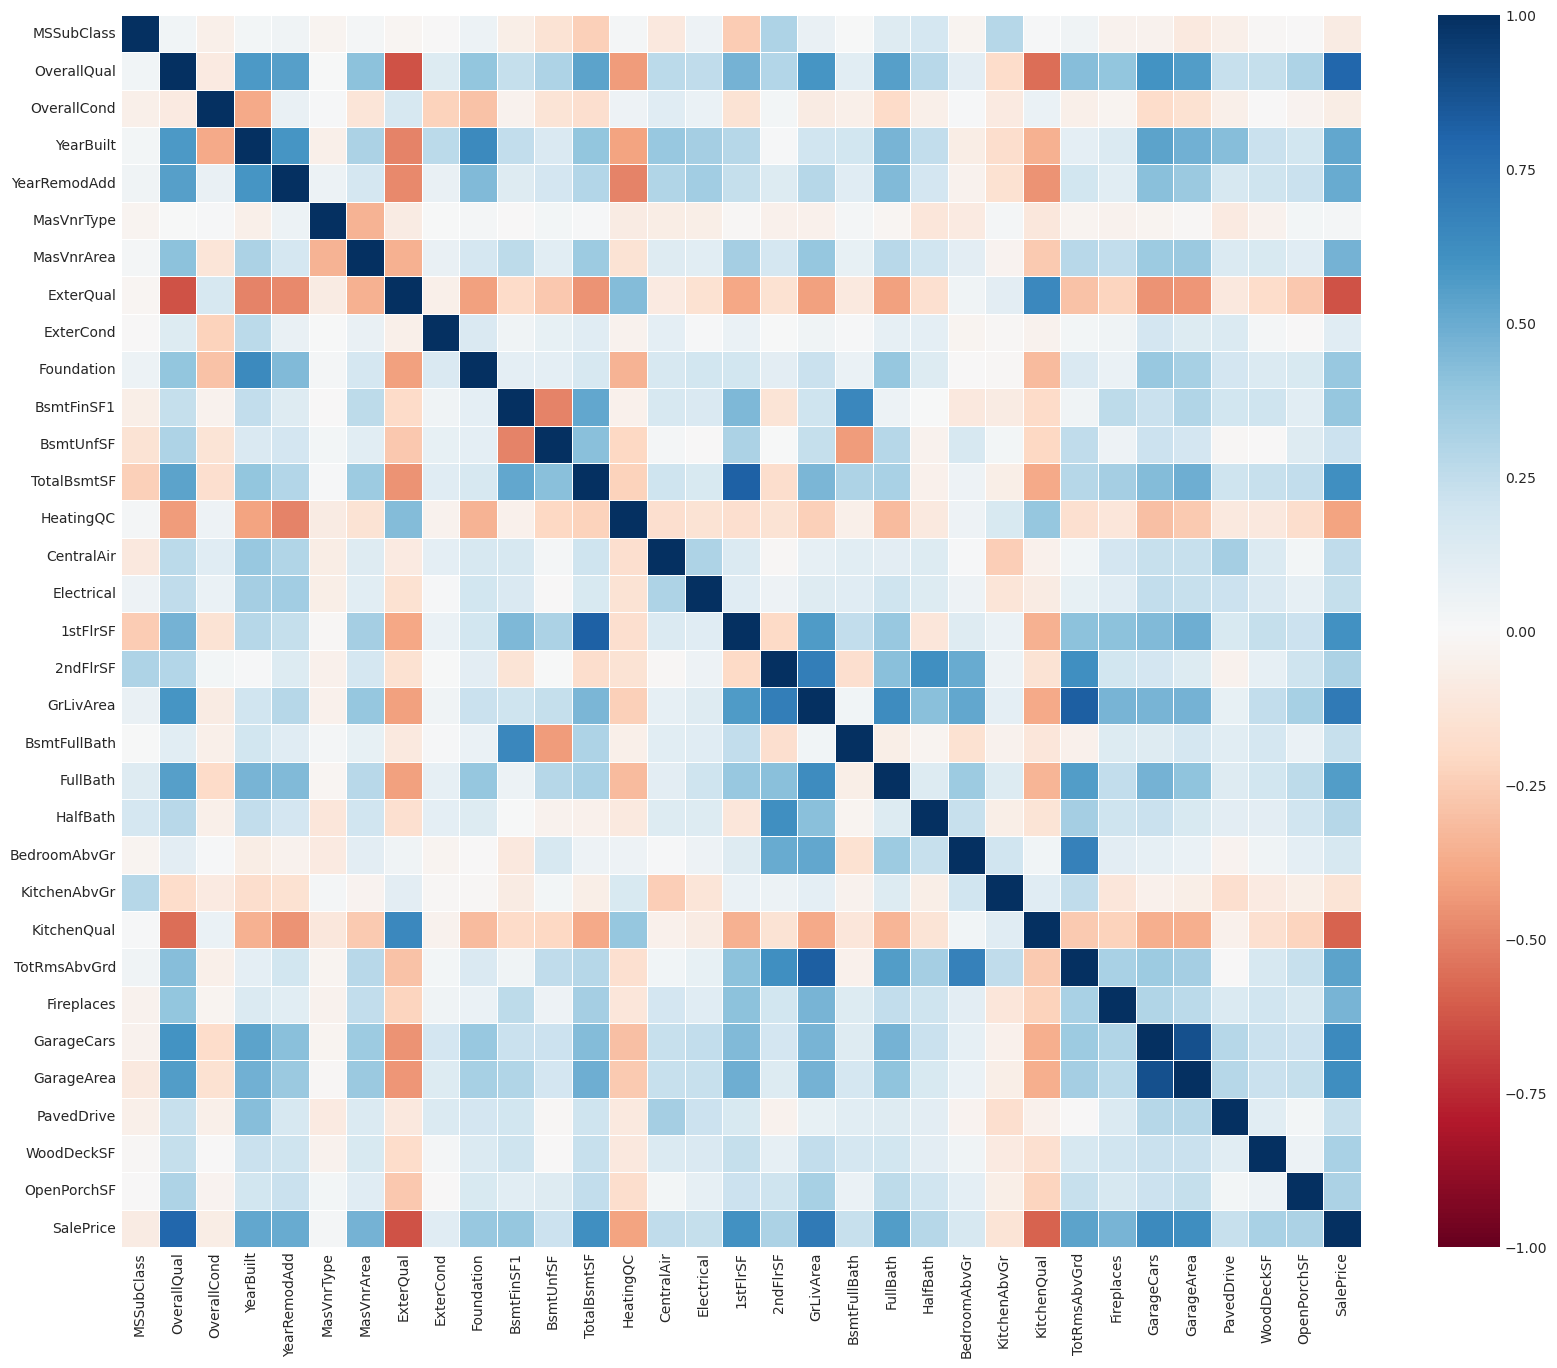

In [45]:
corre_heatmap(df_train_selected)

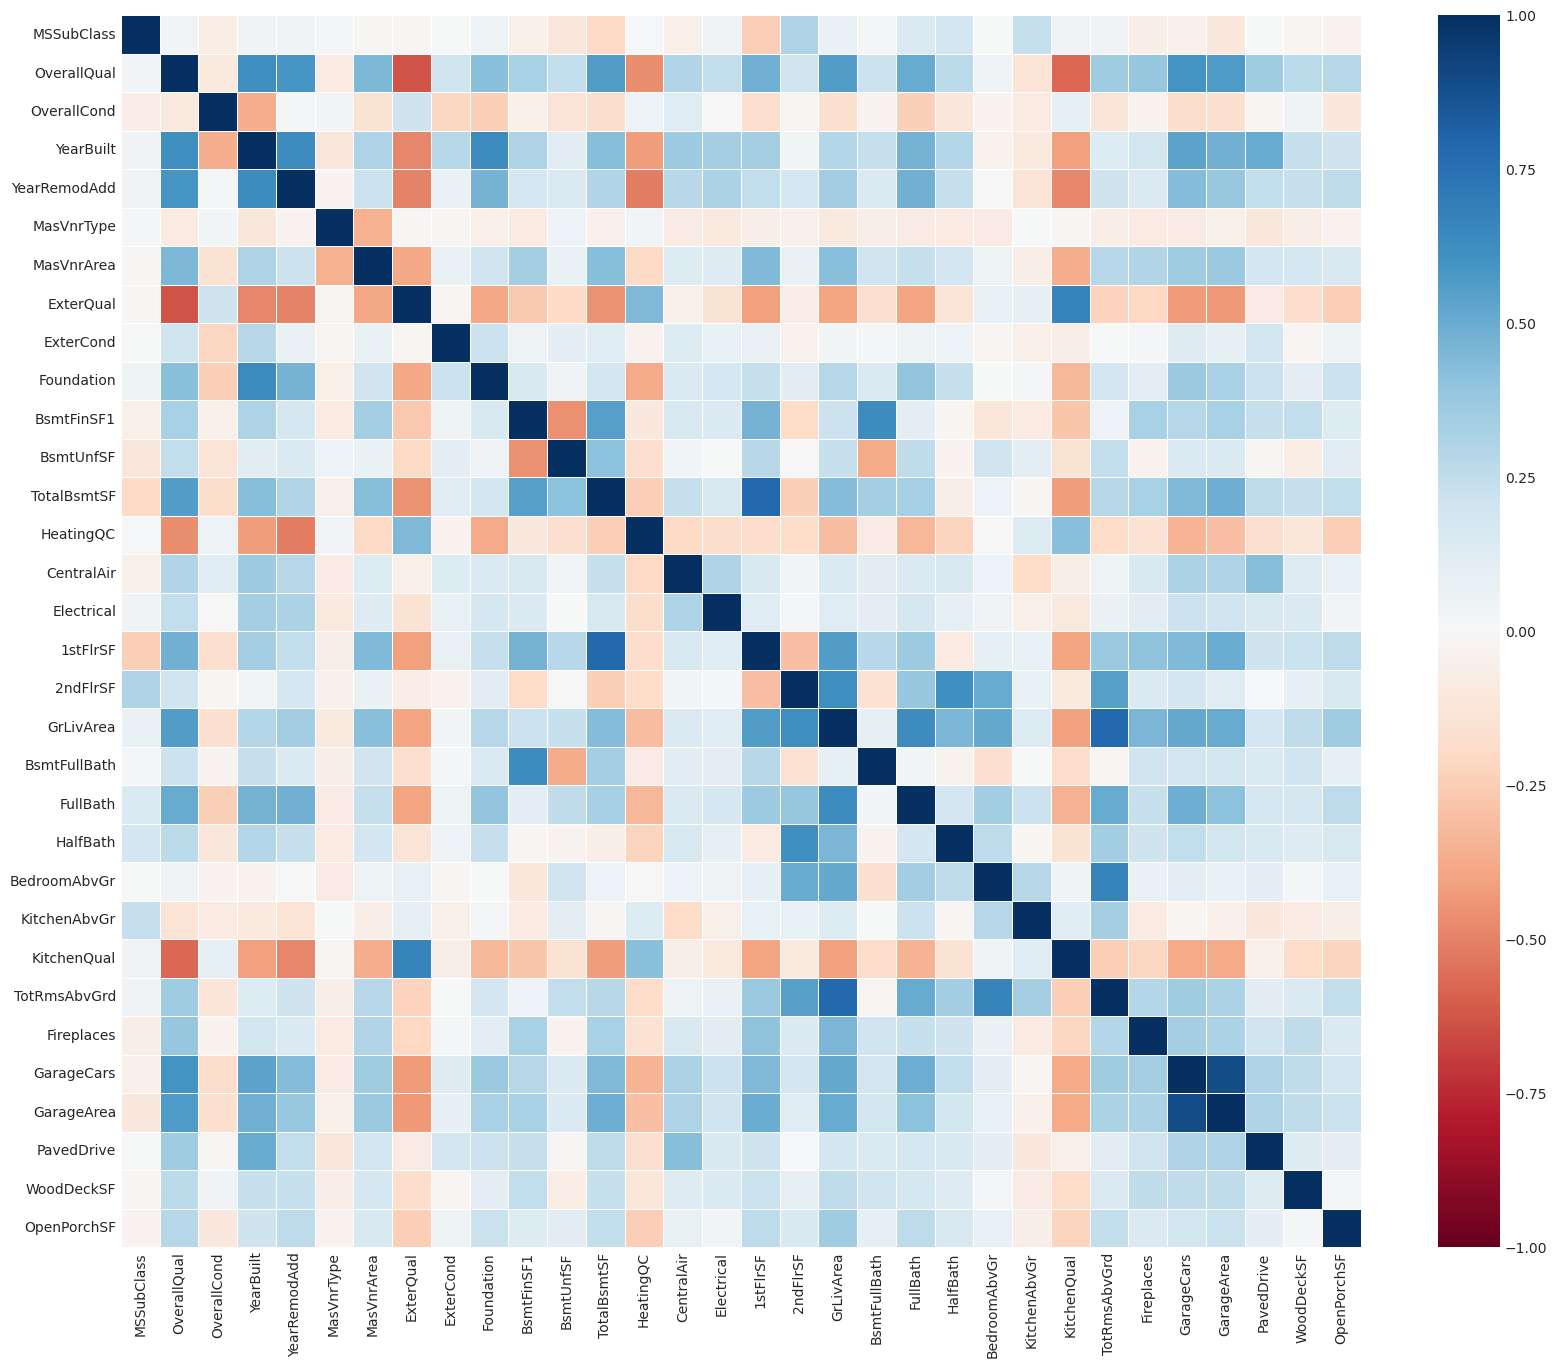

In [46]:
corre_heatmap(df_test_selected)

In [47]:
columns_only_in_df_train_selected = df_train_selected.columns.difference(df_test_selected.columns)
print("Columns only in df_train_selected:")
print(columns_only_in_df_train_selected)

# Find the columns that are in df2 but not in df1
columns_only_in_df_test_selected = df_test_selected.columns.difference(df_train_selected.columns)
print("\nColumns only in df_test_selected:")
print(columns_only_in_df_test_selected)

# Compare the common columns for differences
common_columns = df_train_selected.columns.intersection(df_test_selected.columns)

Columns only in df_train_selected:
Index(['SalePrice'], dtype='object')

Columns only in df_test_selected:
Index([], dtype='object')


In [80]:
df_train_filt

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,706,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2,548,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,978,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,2,460,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,486,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,2,608,2,0,42,0,0,0,0,0,9,2008,8,4,223500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,1458,70,3,9042,1,3,3,0,4,0,6,2,2,0,5,7,9,1941,2006,1,1,5,5,2,0.0,0,2,4,275,0,877,1152,1,0,1,4,1188,1152,0,2340,0,0,2,0,4,1,2,9,6,2,1,252,2,0,60,0,0,0,0,2500,5,2010,8,4,266500
1458,1459,20,3,9717,1,3,3,0,4,0,12,2,2,0,2,5,6,1950,1996,3,1,8,8,2,0.0,3,4,1,49,1029,0,1078,1,2,1,0,1078,0,0,1078,1,0,1,0,2,1,2,5,6,0,1,240,2,366,0,112,0,0,0,0,4,2010,8,4,142125
1459,1460,20,3,9937,1,3,3,0,4,0,7,2,2,0,2,5,6,1965,1965,1,1,6,6,2,0.0,2,4,1,830,290,136,1256,1,2,1,4,1256,0,0,1256,1,0,1,1,3,1,3,6,6,0,1,276,2,736,68,0,0,0,0,0,6,2008,8,4,147500


In [81]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [48]:
def set_dummies(df):
    for i in df:
        if df[i].dtype == 'object':
            df = pd.get_dummies(df, columns=[i], prefix=[i], drop_first=True)
    return df

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df_train_1 = set_dummies(df_train_selected)


    
train_y = df_train_1['SalePrice']
train_X = df_train_1.drop('SalePrice', axis=1)

X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.2, random_state=24)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

    # Compile the model
model.compile(optimizer='adam', loss='mse')

    # Train the model
model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=32, validation_split=0.2)

    # Evaluate the model on the test set
loss = model.evaluate(X_test_scaled, y_test_scaled)
print("Mean Squared Error on Test Set:", loss)

    # Make predictions
predictions_scaled = model.predict(X_test_scaled)
predictions = scaler_y.inverse_transform(predictions_scaled)
    
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Epoch 1/100
30/30 [==============================] - 1s 8ms/step - loss: 0.3753 - val_loss: 0.2947
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 0.1698 - val_loss: 0.2368
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 0.1390 - val_loss: 0.2265
Epoch 4/100
30/30 [==============================] - 0s 3ms/step - loss: 0.1031 - val_loss: 0.2229
Epoch 5/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0919 - val_loss: 0.2062
Epoch 6/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0778 - val_loss: 0.2065
Epoch 7/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0704 - val_loss: 0.1963
Epoch 8/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0634 - val_loss: 0.2034
Epoch 9/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0584 - val_loss: 0.1989
Epoch 10/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0524 - val_loss: 0.2193
Epoch 11/

In [50]:
X_test_scaled = scaler_X.transform(df_test_selected)

predictions_scaled = model.predict(X_test_scaled)
predictions = scaler_y.inverse_transform(predictions_scaled)

y_pred = predictions

46/46 [==============================] - 0s 1ms/step


In [51]:
predictions

array([[133969.19],
       [130987.86],
       [192932.92],
       ...,
       [163946.06],
       [106977.6 ],
       [213878.92]], dtype=float32)

In [52]:
# Print some predictions and their actual values
for i in range(10):
    formatstring = (f"Predicted: {predictions[i]} | Actual: {y_test[i]}")
    print(formatstring)

Predicted: [133969.19] | Actual: [82000]
Predicted: [130987.86] | Actual: [178000]
Predicted: [192932.92] | Actual: [211000]
Predicted: [212106.19] | Actual: [156932]
Predicted: [183536.03] | Actual: [111250]
Predicted: [183249.89] | Actual: [142500]
Predicted: [200755.94] | Actual: [124000]
Predicted: [167472.5] | Actual: [200000]
Predicted: [199122.2] | Actual: [159500]
Predicted: [145395.64] | Actual: [385000]


In [87]:
predictions

array([[133464.8 ],
       [141374.73],
       [167435.52],
       ...,
       [178309.36],
       [ 99025.74],
       [216765.27]], dtype=float32)

In [53]:
y_test

array([[ 82000],
       [178000],
       [211000],
       [156932],
       [111250],
       [142500],
       [124000],
       [200000],
       [159500],
       [385000],
       [109900],
       [179600],
       [424870],
       [169990],
       [ 85000],
       [155000],
       [149000],
       [112500],
       [130500],
       [745000],
       [115000],
       [301500],
       [100000],
       [287000],
       [328000],
       [137000],
       [ 80500],
       [237000],
       [125000],
       [235000],
       [ 84900],
       [110000],
       [107900],
       [342643],
       [151000],
       [263000],
       [219210],
       [144500],
       [200000],
       [107500],
       [135000],
       [163900],
       [157000],
       [335000],
       [163000],
       [129000],
       [139000],
       [205000],
       [301000],
       [116000],
       [108500],
       [ 81000],
       [245500],
       [281213],
       [125500],
       [129900],
       [116000],
       [168500],
       [231500

In [89]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 'predictions' are your model's predictions and 'y_test' are the actual values
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

ValueError: Found input variables with inconsistent numbers of samples: [292, 1459]

In [ ]:
df_test_filt

In [54]:
predictions_df = pd.DataFrame(y_pred, columns=['SalePrice'], index=df_test_filt.index)
merged_df = pd.concat([df_test_filt, predictions_df], axis=1)
merged_df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,468.0,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,1.0,730.0,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,133969.187500
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,923.0,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,1.0,312.0,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,130987.859375
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,791.0,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,2.0,482.0,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,192932.921875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,1224.0,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,2.0,576.0,Y,474,0,0,0,0,0,0,9,2006,WD,Abnorml,163946.062500
1457,2918,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,337.0,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,0.0,0.0,Y,80,32,0,0,0,0,700,7,2006,WD,Normal,106977.601562
1458,2919,60,RL,9627,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,758.0,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,3.0,650.0,Y,190,48,0,0,0,0,0,11,2006,WD,Normal,213878.921875


In [55]:
submit_df = merged_df[['Id', 'SalePrice']]
submit_df

,Id,SalePrice
0,1461,133969.187500
1,1462,130987.859375
2,1463,192932.921875
...,...,...
1456,2917,163946.062500
1457,2918,106977.601562
1458,2919,213878.921875


In [56]:
csv_file_path = '/kaggle/working/my_dataframe.csv'

# Use to_csv to export the DataFrame to a CSV file
submit_df.to_csv(csv_file_path, index=False)  # index=False to exclude the index column

print(f"CSV file saved at {csv_file_path}")

CSV file saved at /kaggle/working/my_dataframe.csv
